In [10]:
import numpy as np
from numpy import loadtxt
from numpy import load

In [11]:
f_path = "D:/DATA SCIENCE/Kaggle Datasets/MNIST AUDIO/archive/X_train.csv"
X_train = loadtxt(f_path,delimiter=',')

f_path = "D:/DATA SCIENCE/Kaggle Datasets/MNIST AUDIO/archive/X_test.csv"
X_test = loadtxt(f_path,delimiter=',')

f_path = "D:/DATA SCIENCE/Kaggle Datasets/MNIST AUDIO/archive/Y_train.csv.npy"
Y_train = load(f_path)
Y_train_int = Y_train.astype("int")

f_path = "D:/DATA SCIENCE/Kaggle Datasets/MNIST AUDIO/archive/Y_test.csv.npy"
Y_test = load(f_path)
Y_test_int = Y_test.astype("int")

###### Modelling

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [13]:
model = Sequential()
# First Layer
model.add(Dense(100,input_shape=(40,),activation='relu'))
# Second Layer
model.add(Dense(200,activation='relu'))
# Third Layer
model.add(Dense(100,activation='relu'))

# output layer
model.add(Dense(10,activation='softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               4100      
_________________________________________________________________
dense_1 (Dense)              (None, 200)               20200     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 45,410
Trainable params: 45,410
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss='sparse_categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')

###### Training Model

In [16]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(filepath='D:/DATA SCIENCE/Kaggle Datasets/MNIST AUDIO/archive/MNIST Audio Classifier.hdf5',
                             verbose=1,save_best_only=True)

num_epochs = 50
batch_size = 32

model.fit(X_train,Y_train_int,validation_data=(X_test,Y_test_int),epochs=num_epochs,batch_size=batch_size,callbacks=[checkpoint],verbose=1)

Epoch 1/50
704/704 [==============================] - 1s 914us/step - loss: 1.4093 - accuracy: 0.6817 - val_loss: 0.6267 - val_accuracy: 0.7584

Epoch 00001: val_loss improved from inf to 0.62666, saving model to D:/DATA SCIENCE/Kaggle Datasets/MNIST AUDIO/archive\MNIST Audio Classifier.hdf5
Epoch 2/50
704/704 [==============================] - 1s 789us/step - loss: 0.4795 - accuracy: 0.8308 - val_loss: 0.6569 - val_accuracy: 0.7717

Epoch 00002: val_loss did not improve from 0.62666
Epoch 3/50
704/704 [==============================] - 1s 768us/step - loss: 0.3503 - accuracy: 0.8781 - val_loss: 0.3275 - val_accuracy: 0.8761

Epoch 00003: val_loss improved from 0.62666 to 0.32751, saving model to D:/DATA SCIENCE/Kaggle Datasets/MNIST AUDIO/archive\MNIST Audio Classifier.hdf5
Epoch 4/50
704/704 [==============================] - 1s 786us/step - loss: 0.3095 - accuracy: 0.8886 - val_loss: 0.4022 - val_accuracy: 0.8523

Epoch 00004: val_loss did not improve from 0.32751
Epoch 5/50
704/704


Epoch 00036: val_loss did not improve from 0.08908
Epoch 37/50
704/704 [==============================] - 1s 816us/step - loss: 0.0400 - accuracy: 0.9856 - val_loss: 0.1079 - val_accuracy: 0.9737

Epoch 00037: val_loss did not improve from 0.08908
Epoch 38/50
704/704 [==============================] - 1s 813us/step - loss: 0.0420 - accuracy: 0.9862 - val_loss: 0.0978 - val_accuracy: 0.9759

Epoch 00038: val_loss did not improve from 0.08908
Epoch 39/50
704/704 [==============================] - 1s 804us/step - loss: 0.0368 - accuracy: 0.9874 - val_loss: 0.1059 - val_accuracy: 0.9725

Epoch 00039: val_loss did not improve from 0.08908
Epoch 40/50
704/704 [==============================] - 1s 774us/step - loss: 0.0335 - accuracy: 0.9894 - val_loss: 0.1110 - val_accuracy: 0.9727

Epoch 00040: val_loss did not improve from 0.08908
Epoch 41/50
704/704 [==============================] - 1s 793us/step - loss: 0.0364 - accuracy: 0.9880 - val_loss: 0.1428 - val_accuracy: 0.9671

Epoch 00041: v

###### Evaluate Model

In [2]:
from tensorflow.keras.models import load_model

In [53]:
model = load_model("D:/DATA SCIENCE/Kaggle Datasets/MNIST AUDIO/archive/MNIST Audio Classifier.hdf5")

In [24]:
X_test.shape

(7500, 40)

In [33]:
Y_pred = model.predict(X_test)

In [39]:
Y_pred = [np.argmax(i) for i in Y_pred]

In [40]:
Y_pred

[7,
 8,
 5,
 4,
 1,
 5,
 1,
 5,
 8,
 1,
 2,
 9,
 2,
 6,
 7,
 6,
 0,
 2,
 5,
 6,
 5,
 2,
 6,
 8,
 3,
 0,
 6,
 7,
 7,
 3,
 3,
 8,
 8,
 0,
 6,
 9,
 4,
 6,
 5,
 5,
 2,
 4,
 0,
 3,
 3,
 9,
 4,
 9,
 8,
 4,
 4,
 5,
 6,
 1,
 1,
 8,
 6,
 5,
 8,
 2,
 4,
 3,
 6,
 6,
 5,
 3,
 4,
 3,
 0,
 7,
 9,
 0,
 2,
 9,
 7,
 4,
 6,
 0,
 9,
 4,
 0,
 6,
 1,
 9,
 8,
 6,
 5,
 5,
 8,
 8,
 1,
 2,
 9,
 1,
 7,
 3,
 0,
 2,
 5,
 6,
 4,
 6,
 3,
 7,
 7,
 0,
 6,
 9,
 7,
 7,
 7,
 7,
 5,
 2,
 8,
 4,
 5,
 5,
 7,
 5,
 8,
 8,
 2,
 2,
 3,
 0,
 2,
 9,
 0,
 6,
 9,
 1,
 2,
 1,
 9,
 5,
 5,
 5,
 4,
 6,
 3,
 3,
 8,
 1,
 4,
 4,
 4,
 7,
 2,
 0,
 5,
 6,
 8,
 4,
 9,
 8,
 8,
 6,
 6,
 0,
 8,
 4,
 5,
 4,
 9,
 6,
 9,
 2,
 3,
 4,
 7,
 1,
 1,
 5,
 8,
 8,
 3,
 9,
 5,
 7,
 5,
 3,
 7,
 2,
 4,
 4,
 4,
 6,
 8,
 5,
 9,
 9,
 6,
 6,
 2,
 6,
 0,
 0,
 6,
 2,
 9,
 4,
 4,
 0,
 9,
 4,
 0,
 4,
 2,
 2,
 0,
 9,
 9,
 2,
 8,
 9,
 5,
 9,
 6,
 9,
 2,
 3,
 8,
 9,
 6,
 0,
 6,
 4,
 3,
 7,
 3,
 7,
 2,
 2,
 1,
 4,
 6,
 1,
 2,
 7,
 1,
 1,
 4,
 5,
 5,
 6,
 9,
 4,
 2,
 9,


###### For Multi-Class Use LabelBinarizer

In [58]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import LabelBinarizer
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
lb = LabelBinarizer()
y_test = lb.fit_transform(Y_test)
y_pred = lb.fit_transform(Y_pred)

In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       747
           1       0.98      0.97      0.97       738
           2       0.97      0.95      0.96       772
           3       0.93      0.97      0.95       760
           4       0.99      0.99      0.99       758
           5       0.98      0.99      0.99       703
           6       1.00      0.99      1.00       734
           7       0.98      0.96      0.97       759
           8       0.98      0.96      0.97       754
           9       0.96      0.99      0.98       775

   micro avg       0.97      0.97      0.97      7500
   macro avg       0.97      0.97      0.97      7500
weighted avg       0.97      0.97      0.97      7500
 samples avg       0.97      0.97      0.97      7500



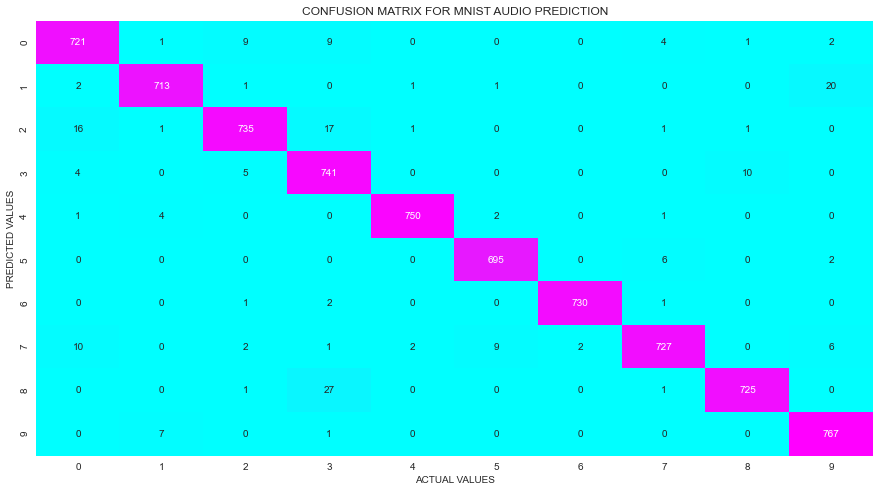

In [66]:
sns.set_style("dark")
plt.figure(figsize=(15,8))
plt.title("CONFUSION MATRIX FOR MNIST AUDIO PREDICTION")
sns.heatmap(confusion_matrix([int(x) for x in Y_test],Y_pred),annot=True,cmap="cool",fmt='g',cbar=False)
plt.xlabel("ACTUAL VALUES")
plt.ylabel("PREDICTED VALUES")
plt.show()